In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight #样本不平衡 加权
from scipy.stats import randint, uniform

data = pd.read_csv('data with AE(latent dim=6).csv')
X = data.drop(columns=['Diagnosis']).values
y = data['Diagnosis'].values
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#样本不平衡 加权
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))  # 转换为字典格式[5](@ref)
class_weights_dict
#sum/2/sum_0   sum/2/sum_1

{0: 0.6515189805561299, 1: 2.1499583027975033}

In [3]:
param_grid = {
    'n_estimators':randint(100, 200),
    'learning_rate': uniform(0.01, 0.1),     
    'max_depth': randint(1,10),
    'subsample':uniform(0.6, 0.9),
    'reg_alpha':uniform(0, 0.1),
    'reg_lambda':uniform(0, 1)
}

# 初始化带类别权重的基准模型
base_model = LGBMClassifier(random_state=42,
                            class_weight=class_weights_dict)


random_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        random_state=42
)

# 执行搜索
random_search.fit(X_train, y_train)


e:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "e:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "e:\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
  File "e:\anaconda3\lib\site-packages\lightgbm\engine.py", line 297, in train
    booster = Booster(params=params, train_set=tra

[LightGBM] [Info] Number of positive: 39571, number of negative: 130581
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 170152, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(class_weight={0: 0.6515189805561299,
                                                          1: 2.1499583027975033},
                                            random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FEA9A097F0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FEA8911FA0>,
                                        'n_estimators'...s._distn_infrastructure.rv_frozen object at 0x000001FEB1915DC0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FEA892D430>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FEA9A09460>,
                                        'subsample': <scipy.stats.

In [4]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'learning_rate': 0.03839209747374657, 'max_depth': 2, 'n_estimators': 165, 'reg_alpha': 0.06918951976926933, 'reg_lambda': 0.6519612595026005, 'subsample': 0.8018423785145038}


In [ ]:
model=LGBMClassifier(learning_rate=0.0383,
                    max_depth=2,
                    n_estimators=165,
                    reg_alpha=0.0691,
                    reg_lambda=0.6519,
                    subsample=0.8018,
                    random_state=42,
                    class_weight=class_weights_dict)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

[LightGBM] [Info] Number of positive: 39571, number of negative: 130581
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 170152, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [8]:
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred,digits=4))

Accuracy: 0.8249
              precision    recall  f1-score   support

           0     0.8481    0.9400    0.8917     32615
           1     0.6938    0.4467    0.5435      9924

    accuracy                         0.8249     42539
   macro avg     0.7710    0.6934    0.7176     42539
weighted avg     0.8121    0.8249    0.8105     42539



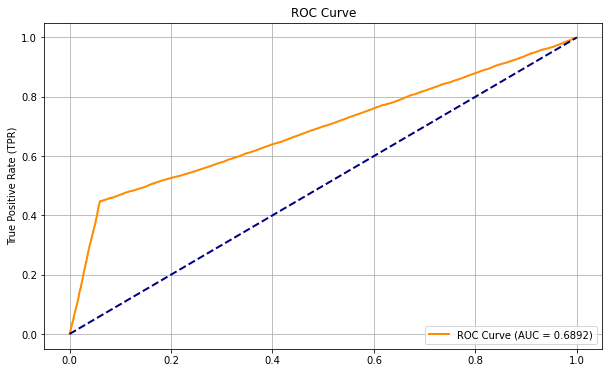

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score=model.predict_proba(X_test)[:,1]
# 计算ROC曲线和AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
roc_auc = roc_auc_score(y_test, y_score)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()